## 1. How would you use bit manipulation to find the only number that doesn’t repeat twice in an array where every other number does?

To find the non-repeating number in an array using bit manipulation, we can use XOR operation ^.

The property of XOR is that it returns 0 when both bits are same and 1 when they’re different. When we XOR all elements in the array, 
duplicates will cancel out as A XOR A = 0. Hence, the remaining value after XORing all elements would be the unique element.

### Answer

In [8]:
def singleNumberBruteForce(nums):
    for num in nums:
        # Count occurrences of the number in the list
        if nums.count(num) == 1:
            return num
singleNumberBruteForce([1,2,6,9,6,1,9])

2

In [9]:
def singleNumber(nums):
    result = 0
    for num in nums:
        result ^= num
    return result

singleNumber([1,3,6,9,6,1,9])

3

In this function, we initialize result to 0 and then iterate over each number in the input list nums.

For each iteration, we perform an XOR operation with result and the current number.

After iterating through all numbers, result holds the unique number which doesn’t repeat twice.

## 2. Fine the Skyline co-ordinates

A skyline is a collection of rectangular strips. A rectangular strip is represented as a pair (left, ht) where left is x coordinate of the 
left side of the strip and ht is the height of the strip.

So, we're after an output that is a list of "key points" (red dots in Figure B) in the format of[ [x1,y1], [x2, y2], [x3, y3], ... ] 
that uniquely defines a skyline.A key point is the left endpoint of a horizontal line segment.

### Answer

The key idea is to process the buildings, `start` and `end` events while maintaining the max heap (to track the maximum height in the buildings)

we are given with the left, right, and height of the buildings

| index | left | right | height |
|-------|------|-------|--------|
| 0     | 2    | 9     | 10     |
| 1     | 3    | 7     | 15     |
| 2     | 5    | 12    | 12     |
| 3     | 15   | 20    | 10     |
| 4     | 19   | 24    | 8      |

Each building generates two events:

*Left edge* -> `(x, -height, right)`  
*Right edge* -> `(x, 0, None)`

Sorting order:

- By x-coordinate (ascending)
- If two events have the same x, we will process start events first (-height ensures sorting order)
- If two start events have the same x, we will process the taller one first

|  x | Height | Right |
|:--:|:------:|:-----:|
| 2  | -10    | 9     |
| 3  | -15    | 7     |
| 5  | -12    | 12    |
| 7  | 0      | None  |
| 9  | 0      | None  |
| 12 | 0      | None  |
| 15 | -10    | 20    |
| 19 | -8     | 24    |
| 20 | 0      | None  |
| 24 | 0      | None  |

We maintain an active buildings max-heap to track the current tallest building at any point.

Initialize: Start with height `0` at ∞

we will process each event:
- Remove expired buildings (buildings whose right boundary has been passed)
- Insert new buildings (add to heap)
- Update skyline if the max height changes


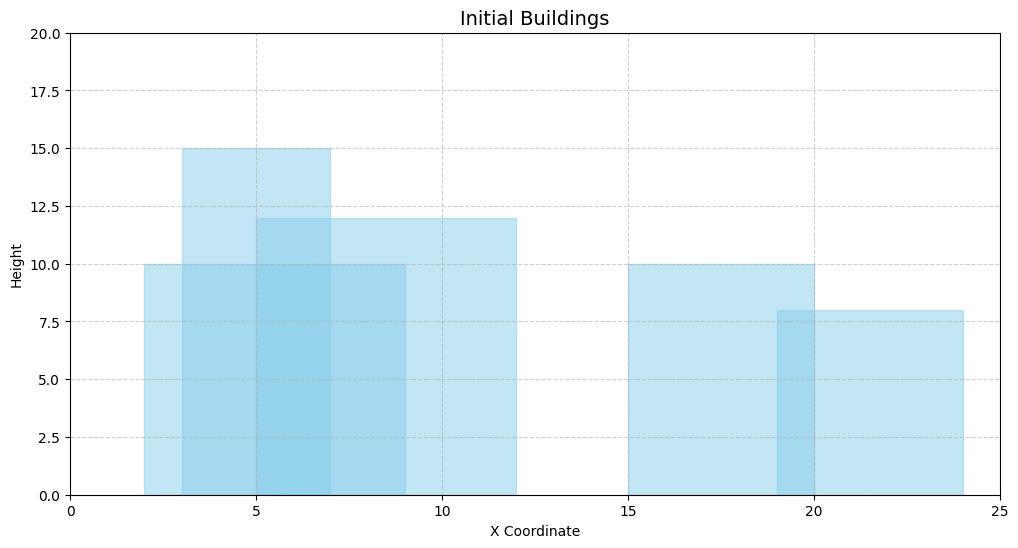

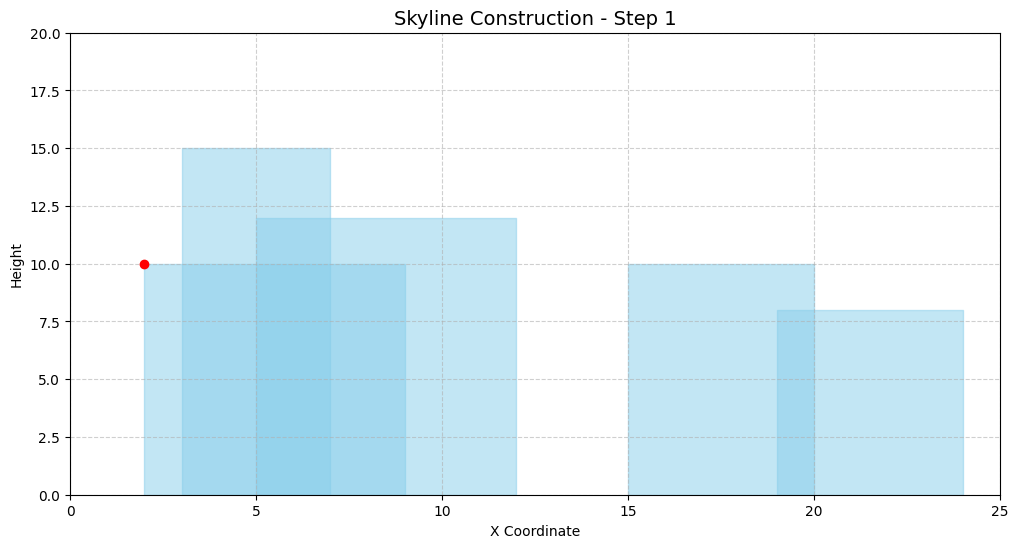

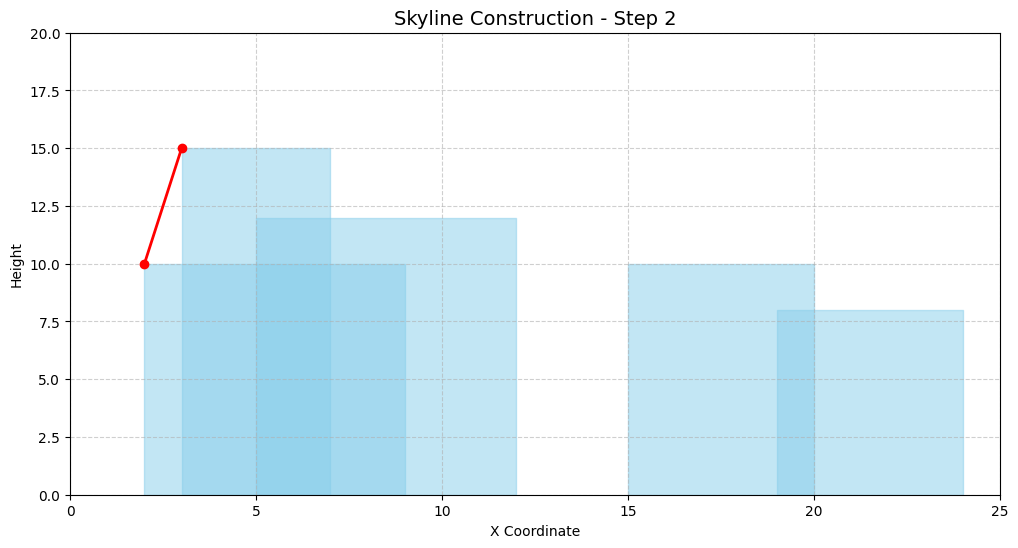

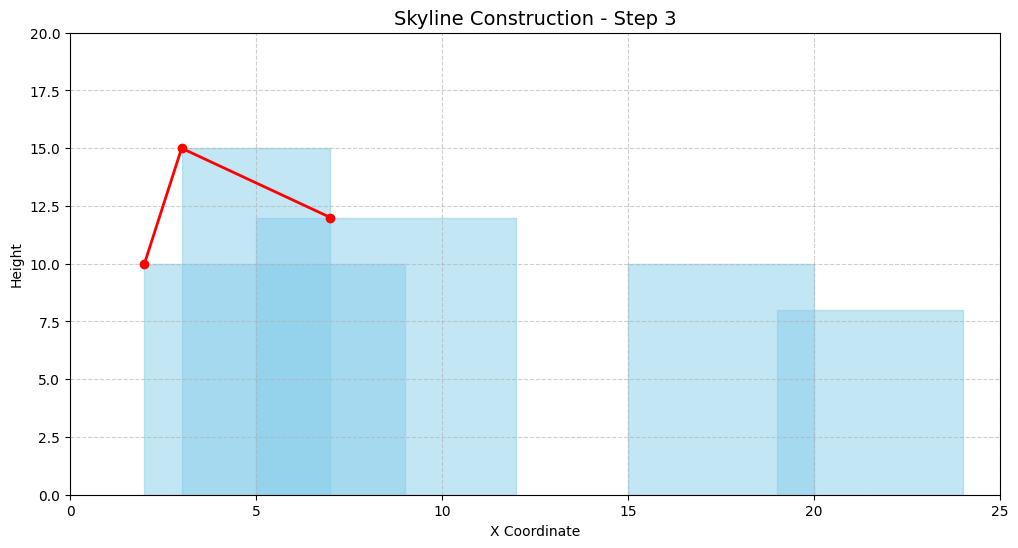

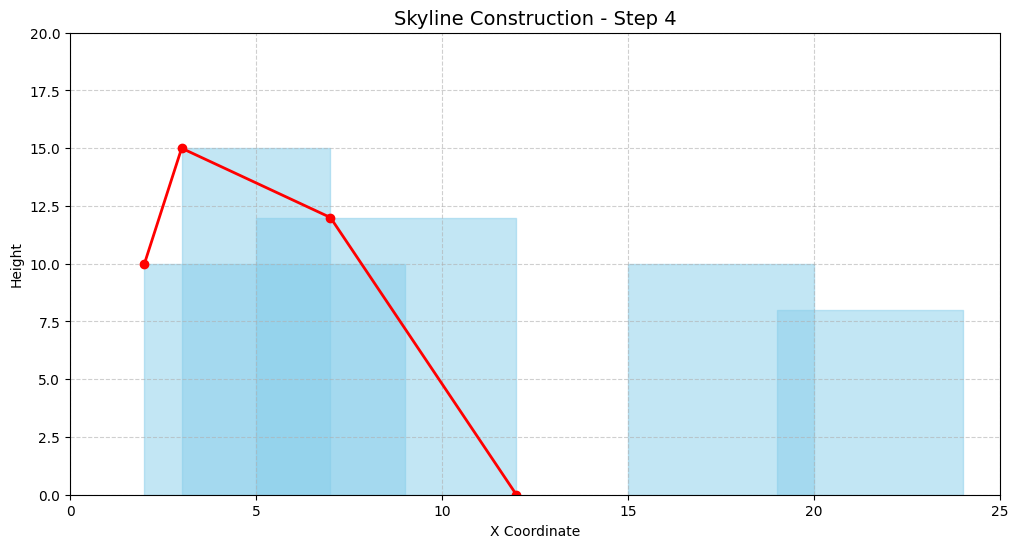

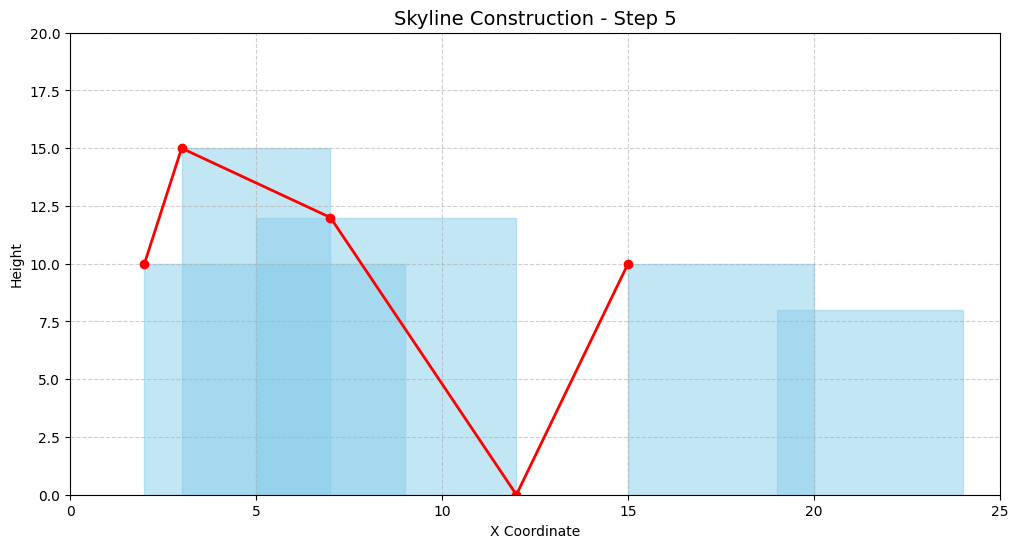

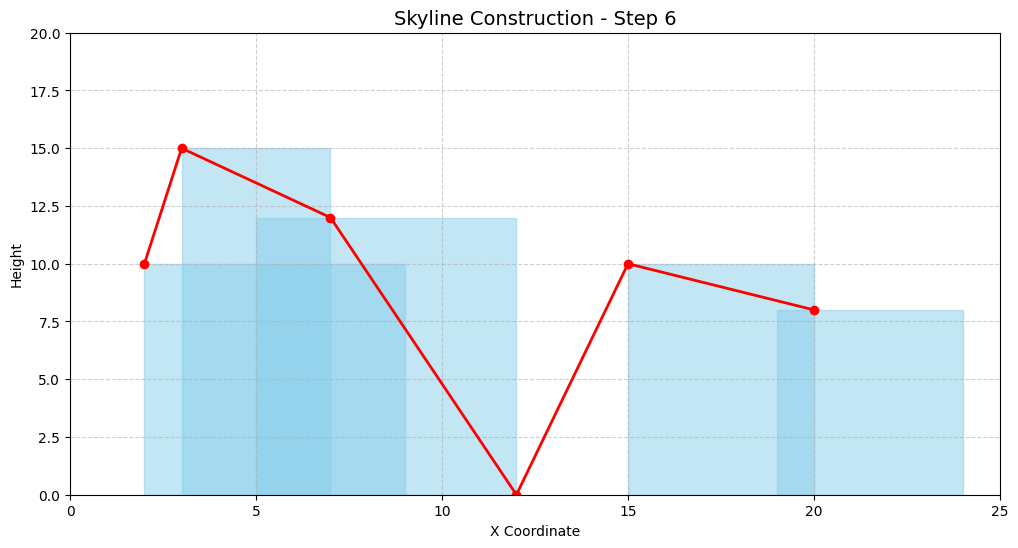

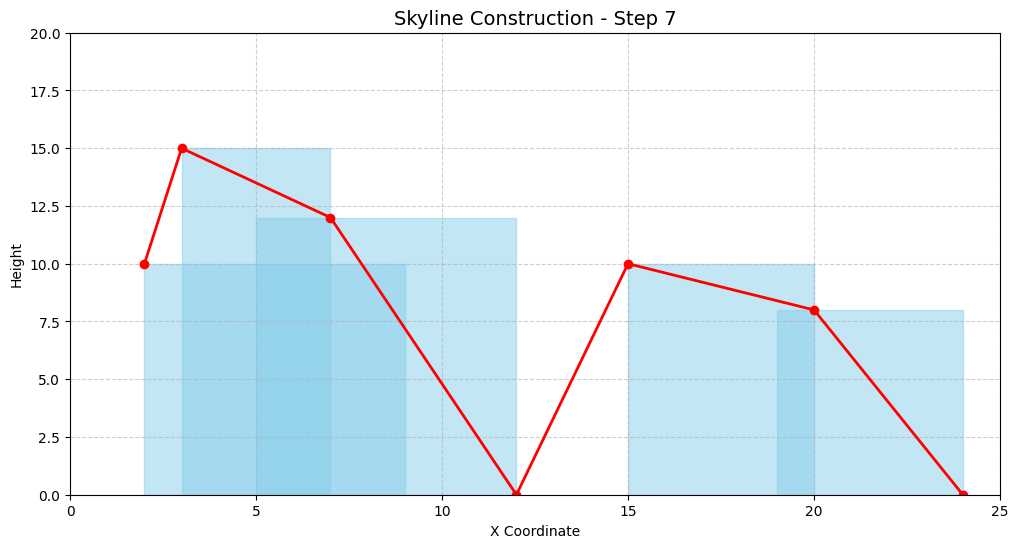

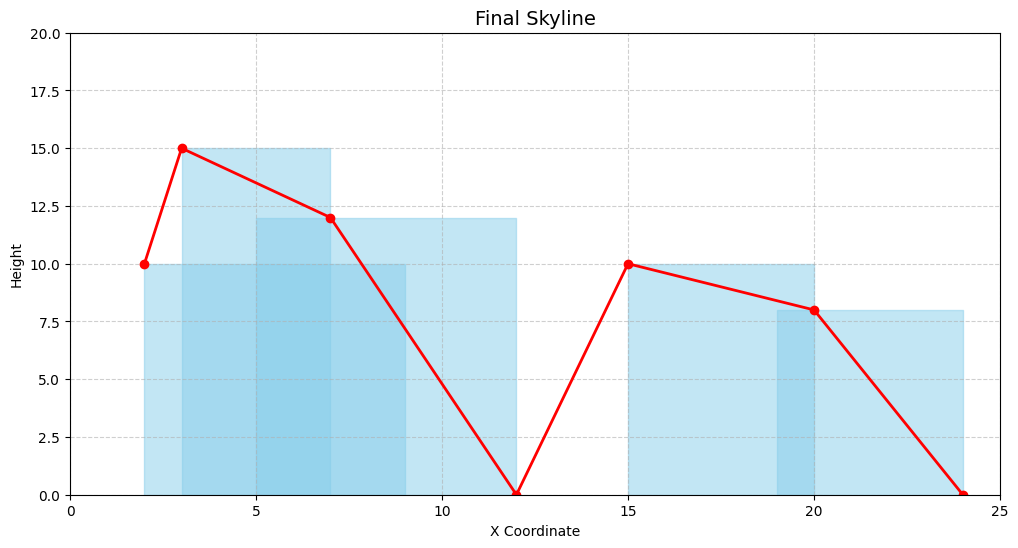

[[2, 10], [3, 15], [7, 12], [12, 0], [15, 10], [20, 8], [24, 0]]

In [2]:
import heapq
import matplotlib.pyplot as plt

class Skyline:
    def __init__(self, buildings):
        self.buildings = buildings
        self.events = self.prepare_skyline_events()
        self.active_buildings = [(0, float('inf'))]
        self.skyline = []
        self.step = 1

    def prepare_skyline_events(self):
        events = []
        for left, right, height in self.buildings:
            # Start event: negative height to prioritize taller buildings
            events.append((left, -height, right))
            # End event: height is 0, right edge of the building
            events.append((right, 0, None))
        # Sort events by x-coordinate, then by height
        events.sort(key=lambda x: (x[0], x[1]))
        return events

    def update_active_buildings(self, event):
        left, neg_height, right = event
        # Remove buildings that are no longer active
        while self.active_buildings and self.active_buildings[0][1] <= left:
            heapq.heappop(self.active_buildings)
        # Add the current building to the active list if it's a start event
        if neg_height != 0:
            heapq.heappush(self.active_buildings, (neg_height, right))
        # Return the current maximum height (skyline height)
        return -self.active_buildings[0][0]

    def add_skyline_point(self, left, height):
        # Add a new point to the skyline if the height changes
        if not self.skyline or self.skyline[-1][1] != height:
            self.skyline.append([left, height])
            self.plot_skyline_step()

    def get_skyline(self):
        self.plot_skyline_step(initial=True)
        for event in self.events:
            height = self.update_active_buildings(event)
            self.add_skyline_point(event[0], height)
        self.plot_skyline_step(final=True)
        return self.skyline

    def plot_skyline_step(self, initial=False, final=False):
        fig, ax = plt.subplots(figsize=(12, 6))

        for left, right, height in self.buildings:
            ax.fill_between([left, right], height, color='skyblue', alpha=0.5)

        if self.skyline:
            x_vals, y_vals = zip(*self.skyline)
            ax.plot(x_vals, y_vals, marker='o', color='red', linestyle='-', linewidth=2, markersize=6)

        title = "Initial Buildings" if initial else f"Skyline Construction - Step {self.step}" if not final else "Final Skyline"
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Height')
        ax.set_xlim(0, 25)
        ax.set_ylim(0, 20)
        ax.grid(True, linestyle='--', alpha=0.6)

        plt.show()
        if not initial and not final:
            self.step += 1

class Solution:
    def getSkyline(self, buildings):
        return Skyline(buildings).get_skyline()

# Test case
buildings = [[2, 9, 10], [3, 7, 15], [5, 12, 12], [15, 20, 10], [19, 24, 8]]
solution = Solution()
skyline = solution.getSkyline(buildings)
skyline

## 3. Intersection Rectangles

In [16]:
class Rectangle():
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.width = w
        self.height = h
        
    def print(self):
        return (self.x, self.y, self.width, self.height)

def checkIntersect(r1, r2):
    if not intersect(r1, r2):
        return Rectangle(0,0,0,0).print()
    else:
        return Rectangle(
    max(r1.x, r2.x), max(r1.y, r2.y),
    min(r1.x + r1.width, r2.x + r2.width) - max(r1.x, r2.x),
    min(r1.y + r1.height, r2.y + r2.height) - max(r1.y, r2.y)
    ).print()

def intersect(r1, r2):
    return (r1.x <= (r2.x + r2.width) and (r1.x + r1.width) >= r2.x and
         r1.y <= (r2.y + r2.height) and (r1.y + r1.height) >= r2.y)

In [15]:
x1, y1, w1, h1 = 3, 3, 5, 5  # Rectangle 1
x2, y2, w2, h2 = 4, 4, 6, 6  # Rectangle 2
x3, y3, w3, h3 = 10, 10, 4, 4  # Rectangle 3

r1 = Rectangle(x1, y1, w1, h1)
r2 = Rectangle(x2, y2, w2, h2)
r3 = Rectangle(x3, y3, w3, h3)

result1 = checkIntersect(r1, r2)
result2 = checkIntersect(r1, r3)

print("Intersection of r1 and r2:", result1)
print("Intersection of r1 and r3:", result2)

Intersection of r1 and r2: (4, 4, 4, 4)
Intersection of r1 and r3: (0, 0, 0, 0)


We defined a Rectangle class with an initializer (`__init__`) that sets the rectangle's position (x, y) and dimensions (width, height). 
It also has a print method that returns the rectangle's properties as a tuple.

The intersect function checks if two rectangles (r1 and r2) overlap by comparing their positions and dimensions. 
It returns True if they intersect, otherwise False.

The checkIntersect function uses intersect to determine if two rectangles overlap. If they don't, it returns a "null" rectangle with all properties set to 0. If they do intersect, it calculates and returns the overlapping area as a new Rectangle object, using the max and min functions to find the intersection boundaries.

We need to collect points, and to collect them, we need to range over the two dimensions of the rectangle. This will constrain us to a quadratic time complexity. Similarly, to collect common points ranging over two rectangles, we are also constrained to a squared time complexity. For the above reasons, the time complexity of this algorithm is overall O(n²).

In short, this code checks if two rectangles overlap, calculates the overlapping area if they do, and operates with a time complexity of O(n²) due to the need to range over the dimensions of the rectangles.

## 4. rectangles intersection count area problem
- Since there are N rectangles and each rectangle has 2 X-coordinates and 2 Y-coordinates. There will be a total of 2*N number of 
X -coordinates and Y-coordinates.
- Create a vector of X and Y coordinates and push all the X’s and Y’s from the rectangles in the respective vectors.
- Initialize a variable, say maxRectangles as 0 that stores the maximum overlapping rectangles.
- Traverse the vector X[] and for each coordinate X[i], traverse the vector Y[] and find the number of overlapping rectangles 
with X[i] and after this step, update the value of maxRectangles to a maximum of maxRectangles and count obtained for the current iteration.
- After completing the above steps, print the value of maxRectangles as the result.

### Algorithm

we will use the line sweep approach, where instead of processing each rectangle directly, we break them into events that define when a rectangle starts and ends along the x-axis

1. Sweep on X Axis     
Each rectangle contributes two events:
- **Start Event** `(x1, y1, y2, 1)` - Indicates the rectangle begins at x1
- **End Event** `(x2, y1, y2, -1)` - Indicates the rectangle ends at x2

We sort these events based on the `x` coordinate to process them in order

2. Active Intervals on the Y-axis    
Then we maintain a list of active y-intervals representing the vertical segments currently being covered as the sweep progresses from left to right. The `get_y_range` function computes the total vertical height covered by these active intervals, considering overlaps.

3. Calculating Area:  
As we move from one `x` position to the next (x_last → x_curr), we compute the contribution to the area using:
$$width \times covered height$$

where:
- width = x_curr - x_last
- covered height = get_y_range(intervals)

4. Updating Active Intervals:  

- **Start event** (`+1`) → Add the (y1, y2) interval
- **End event** (`-1`) → Remove the (y1, y2) interval

This ensures that as we move along the x-axis, we correctly track the vertical coverage and avoid double-counting overlapping areas.


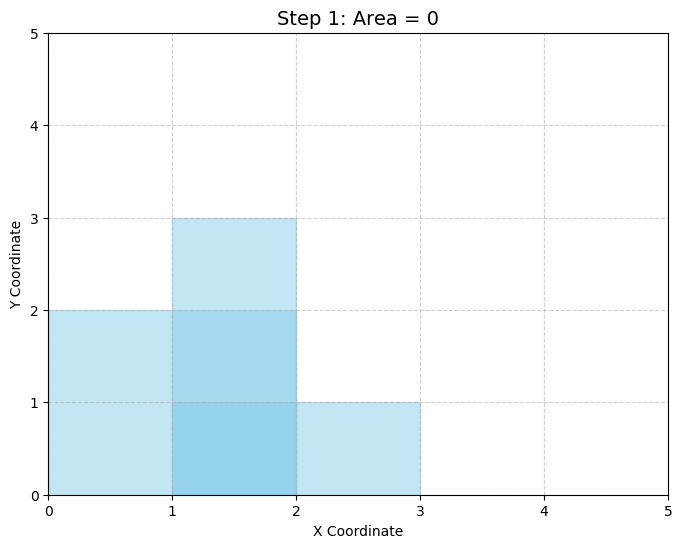

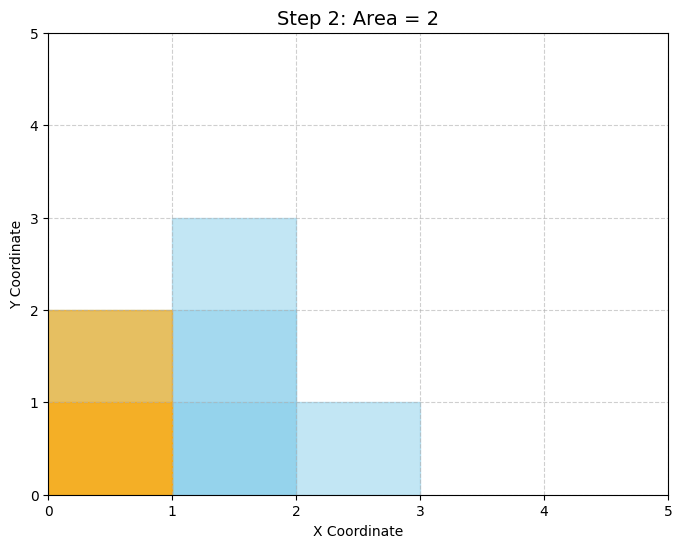

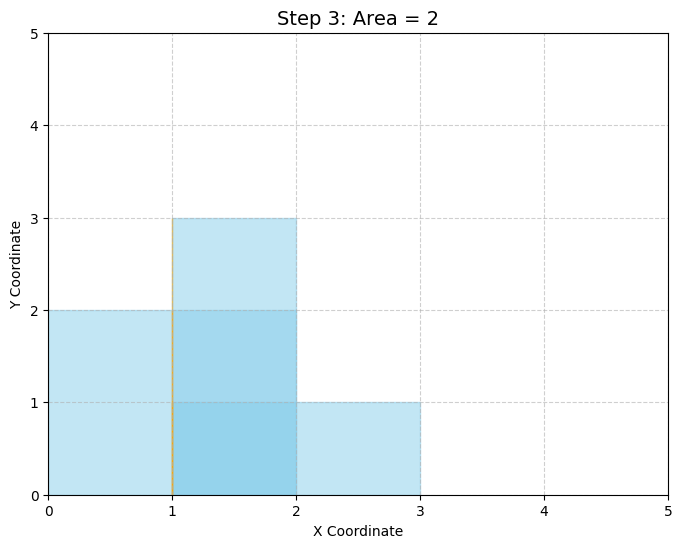

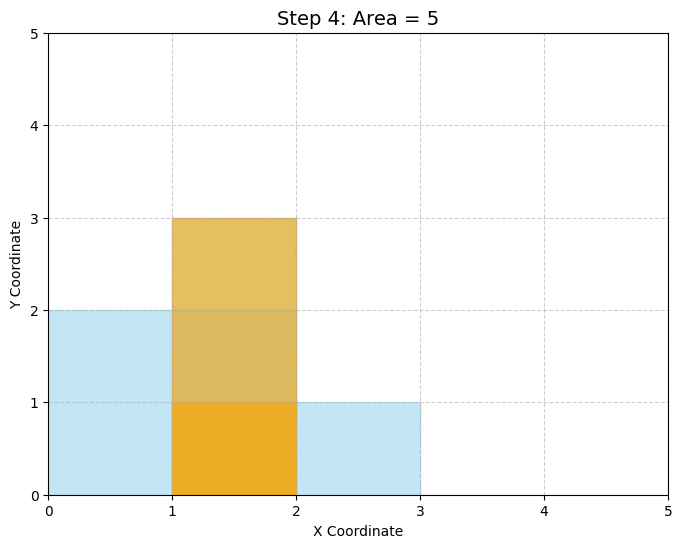

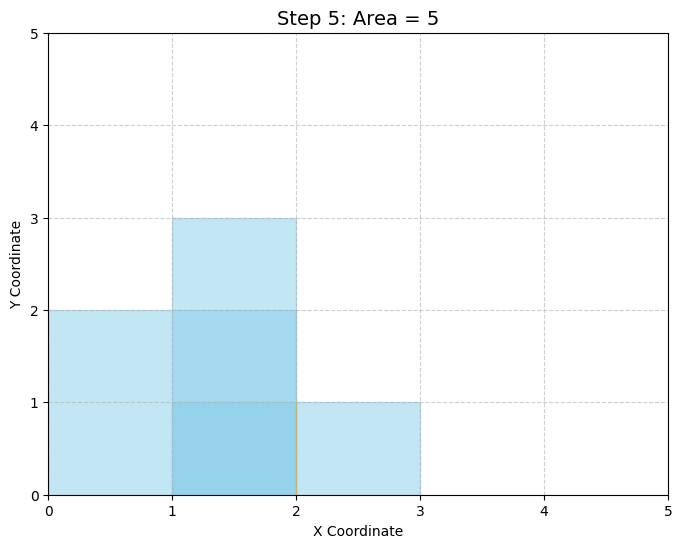

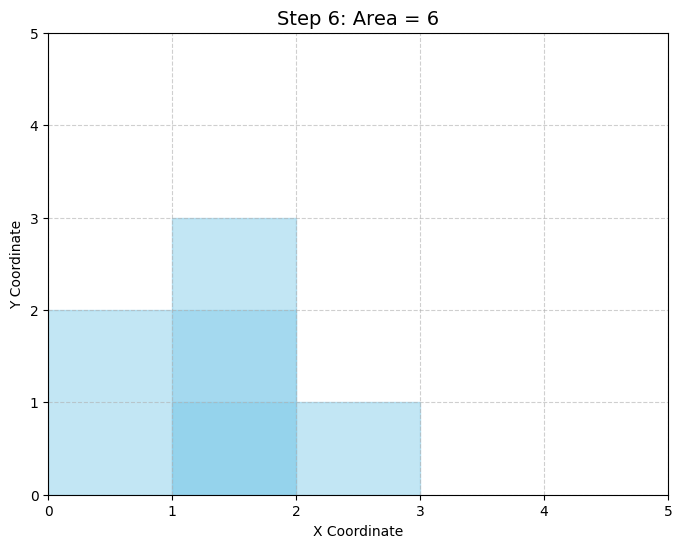

Total Area: 6


In [24]:
import matplotlib.pyplot as plt
from typing import List

class Rectangle:
    def __init__(self, x, y, w, h):
        self.x1 = x
        self.y1 = y
        self.x2 = x + w
        self.y2 = y + h

class Solution:
    def get_y_range(self, intervals):
        """
        Calculates the total vertical length covered by active y-intervals.
        Sorting intervals ensures we process from bottom to top.
        
        Logic:
            - max(y1, y_last): Ensures that we avoid counting overlapping parts twice.
            - cur_area += max(0, y2 - max(y1, y_last)): Only adds newly uncovered vertical space.
        """
        intervals.sort()
        cur_area, y_last = 0, -1
        for y1, y2 in intervals:
            cur_area += max(0, y2 - max(y1, y_last))
            y_last = max(y2, y_last)
        return cur_area

    def plot_state(self, rectangles, intervals, x_last, x_curr, total_area, step):
        """
        Plots the current state of the rectangles and active intervals.
        """
        fig, ax = plt.subplots(figsize=(8, 6))

        # Plot all rectangles
        for rect in rectangles:
            ax.fill_betweenx([rect.y1, rect.y2], rect.x1, rect.x2, color='skyblue', alpha=0.5)

        # Highlight active intervals
        for y1, y2 in intervals:
            ax.fill_betweenx([y1, y2], x_last, x_curr, color='orange', alpha=0.6)

        ax.set_title(f"Step {step}: Area = {total_area}", fontsize=14)
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_xlim(0, 5)
        ax.set_ylim(0, 5)
        ax.grid(True, linestyle='--', alpha=0.6)

        plt.show()

    # Adds start and end events for each rectangle
    # Sorts events first by x, then by type to process in correct order
    def rectangleArea(self, rectangles: List[Rectangle]) -> int:
        """
        Calculates the total area covered by the rectangles.
        
        Steps:
            1. Create events for the start and end of each rectangle.
            2. Sort events by x-coordinate and type (start before end).
            3. Process each event, updating the active intervals and calculating the area.
        """
        events = []
        for rect in rectangles:
            events.append((rect.x1, rect.y1, rect.y2, 1))  # Start event
            events.append((rect.x2, rect.y1, rect.y2, -1))  # End event
        events.sort()

        intervals = []
        total_area = 0
        x_last = events[0][0]

        for step, (x, y1, y2, typ) in enumerate(events, 1):
            # Calculate the area covered by the current active intervals
            total_area += self.get_y_range(intervals) * (x - x_last)

            if typ == 1:
                intervals.append((y1, y2)) # +1 → Add interval for new rectangle
            else:
                intervals.remove((y1, y2)) # -1 → Remove interval when a rectangle ends.

            self.plot_state(rectangles, intervals, x_last, x, total_area, step)
            x_last = x

        return total_area

# Test case
rectangles = [Rectangle(0, 0, 2, 2), Rectangle(1, 0, 1, 3), Rectangle(1, 0, 2, 1)]
solution = Solution()
area = solution.rectangleArea(rectangles)
print(f"Total Area: {area}")